**Hand writings generation using GAN Network with MNIST**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import keras
from keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras.models import Sequential 
from keras import initializers

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

Loading Dataset

In [2]:
# load dataset
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Visualization

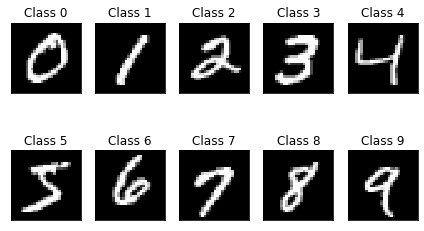

In [4]:
plt.figure()
for i in range(10):
  plt.subplot(2, 5, i+1)
  xy = Xtrain[Ytrain == i]
  plt.imshow(xy[0], cmap='gray', interpolation='none')
  plt.title("Class %d" % (i))
  plt.xticks([])
  plt.yticks([])    
plt.tight_layout()

Processing and reshaping of X values

In [5]:
print("Xtrain shape",Xtrain.shape)
print("Xtest shape", Xtest.shape)

# Normalization
Xtrain = Xtrain/255.
Xtest = Xtest/255.

# reshaping
Xtrain = Xtrain.reshape(Xtrain.shape[0],784)
Xtest = Xtest.reshape(Xtest.shape[0],784)

print("Xtrain shape after reshape",Xtrain.shape)
print("Xtest shape after reshape", Xtest.shape)

Xtrain shape (60000, 28, 28)
Xtest shape (10000, 28, 28)
Xtrain shape after reshape (60000, 784)
Xtest shape after reshape (10000, 784)


**Defining the Model**

Defining the Generator

In [6]:
# Defining Latent space
latent = 100

# Defining the Img Dimensions
img_dim =784

# Defining the initializer to initiate random weights to the model
init = initializers.RandomNormal(stddev= 0.2)

In [25]:
# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='sigmoid'))

# Summary 
generator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dense_24 (Dense)             (None, 512)              

In [26]:
# Defining the Discriminator
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

# Summary
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [30]:
# Compiling the discriminator

opt = keras.optimizers.Adam(lr = 0.0002)
discriminator.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

**Combining the Models to one GAN**

In [31]:
gan = Sequential()

gan.add(generator)
gan.add(discriminator)

# Display the summary
gan.summary()

# Compiling the generator
gan.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 784)               583312    
_________________________________________________________________
sequential_9 (Sequential)    (None, 1)                 265601    
Total params: 848,913
Trainable params: 847,121
Non-trainable params: 1,792
_________________________________________________________________


**Training of the Model**

epoch = 1/100, d_loss=0.571, g_loss=0.673                                                                                                     


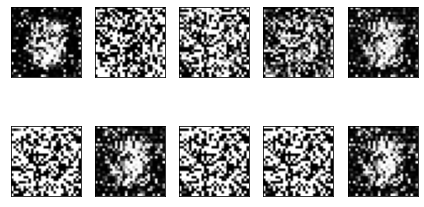

epoch = 2/100, d_loss=0.596, g_loss=0.674                                                                                                     
epoch = 3/100, d_loss=0.586, g_loss=0.662                                                                                                     
epoch = 4/100, d_loss=0.642, g_loss=0.604                                                                                                     
epoch = 5/100, d_loss=0.603, g_loss=0.633                                                                                                     
epoch = 6/100, d_loss=0.620, g_loss=0.601                                                                                                     
epoch = 7/100, d_loss=0.601, g_loss=0.651                                                                                                     
epoch = 8/100, d_loss=0.591, g_loss=0.634                                                                                                     

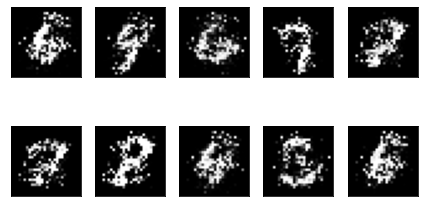

epoch = 12/100, d_loss=0.614, g_loss=0.625                                                                                                     
epoch = 13/100, d_loss=0.588, g_loss=0.637                                                                                                     
epoch = 14/100, d_loss=0.638, g_loss=0.610                                                                                                     
epoch = 15/100, d_loss=0.634, g_loss=0.614                                                                                                     
epoch = 16/100, d_loss=0.603, g_loss=0.629                                                                                                     
epoch = 17/100, d_loss=0.599, g_loss=0.614                                                                                                     
epoch = 18/100, d_loss=0.606, g_loss=0.612                                                                                              

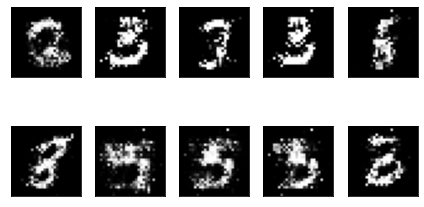

epoch = 22/100, d_loss=0.650, g_loss=0.568                                                                                                     
epoch = 23/100, d_loss=0.639, g_loss=0.576                                                                                                     
epoch = 24/100, d_loss=0.636, g_loss=0.571                                                                                                     
epoch = 25/100, d_loss=0.649, g_loss=0.559                                                                                                     
epoch = 26/100, d_loss=0.628, g_loss=0.590                                                                                                     
epoch = 27/100, d_loss=0.634, g_loss=0.586                                                                                                     
epoch = 28/100, d_loss=0.634, g_loss=0.566                                                                                              

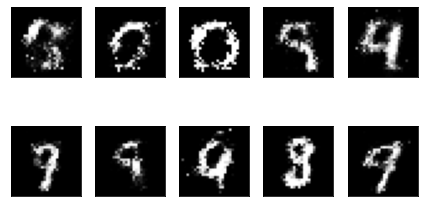

epoch = 32/100, d_loss=0.639, g_loss=0.556                                                                                                     
epoch = 33/100, d_loss=0.624, g_loss=0.574                                                                                                     
epoch = 34/100, d_loss=0.638, g_loss=0.578                                                                                                     
epoch = 35/100, d_loss=0.623, g_loss=0.560                                                                                                     
epoch = 36/100, d_loss=0.643, g_loss=0.558                                                                                                     
epoch = 37/100, d_loss=0.643, g_loss=0.543                                                                                                     
epoch = 38/100, d_loss=0.647, g_loss=0.552                                                                                              

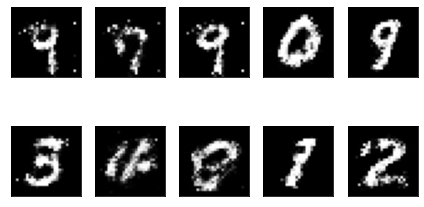

epoch = 42/100, d_loss=0.645, g_loss=0.554                                                                                                     
epoch = 43/100, d_loss=0.626, g_loss=0.595                                                                                                     
epoch = 44/100, d_loss=0.652, g_loss=0.551                                                                                                     
epoch = 45/100, d_loss=0.637, g_loss=0.559                                                                                                     
epoch = 46/100, d_loss=0.650, g_loss=0.592                                                                                                     
epoch = 47/100, d_loss=0.632, g_loss=0.562                                                                                                     
epoch = 48/100, d_loss=0.651, g_loss=0.547                                                                                              

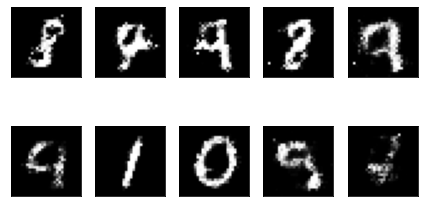

epoch = 52/100, d_loss=0.661, g_loss=0.540                                                                                                     
epoch = 53/100, d_loss=0.662, g_loss=0.547                                                                                                     
epoch = 54/100, d_loss=0.650, g_loss=0.556                                                                                                     
epoch = 55/100, d_loss=0.632, g_loss=0.549                                                                                                     
epoch = 56/100, d_loss=0.660, g_loss=0.543                                                                                                     
epoch = 57/100, d_loss=0.634, g_loss=0.581                                                                                                     
epoch = 58/100, d_loss=0.648, g_loss=0.545                                                                                              

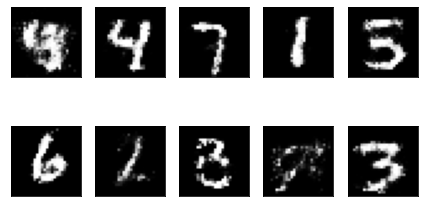

epoch = 62/100, d_loss=0.627, g_loss=0.569                                                                                                     
epoch = 63/100, d_loss=0.620, g_loss=0.578                                                                                                     
epoch = 64/100, d_loss=0.663, g_loss=0.534                                                                                                     
epoch = 65/100, d_loss=0.654, g_loss=0.547                                                                                                     
epoch = 66/100, d_loss=0.673, g_loss=0.549                                                                                                     
epoch = 67/100, d_loss=0.660, g_loss=0.520                                                                                                     
epoch = 68/100, d_loss=0.653, g_loss=0.562                                                                                              

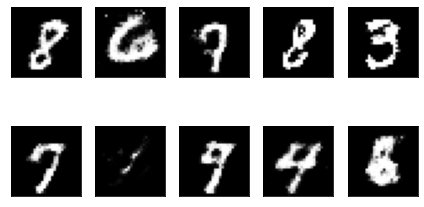

epoch = 72/100, d_loss=0.665, g_loss=0.542                                                                                                     
epoch = 73/100, d_loss=0.647, g_loss=0.557                                                                                                     
epoch = 74/100, d_loss=0.651, g_loss=0.545                                                                                                     
epoch = 75/100, d_loss=0.653, g_loss=0.542                                                                                                     
epoch = 76/100, d_loss=0.660, g_loss=0.538                                                                                                     
epoch = 77/100, d_loss=0.682, g_loss=0.527                                                                                                     
epoch = 78/100, d_loss=0.658, g_loss=0.518                                                                                              

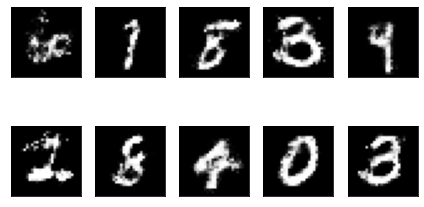

epoch = 82/100, d_loss=0.651, g_loss=0.541                                                                                                     
epoch = 83/100, d_loss=0.674, g_loss=0.518                                                                                                     
epoch = 84/100, d_loss=0.659, g_loss=0.539                                                                                                     
epoch = 85/100, d_loss=0.646, g_loss=0.545                                                                                                     
epoch = 86/100, d_loss=0.680, g_loss=0.534                                                                                                     
epoch = 87/100, d_loss=0.685, g_loss=0.513                                                                                                     
epoch = 88/100, d_loss=0.667, g_loss=0.548                                                                                              

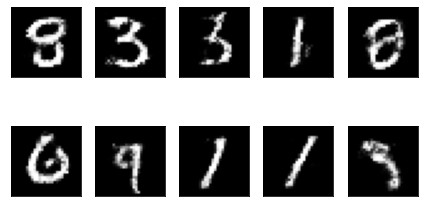

epoch = 92/100, d_loss=0.677, g_loss=0.514                                                                                                     
epoch = 93/100, d_loss=0.690, g_loss=0.514                                                                                                     
epoch = 94/100, d_loss=0.660, g_loss=0.536                                                                                                     
epoch = 95/100, d_loss=0.655, g_loss=0.551                                                                                                     
epoch = 96/100, d_loss=0.652, g_loss=0.529                                                                                                     
epoch = 97/100, d_loss=0.696, g_loss=0.539                                                                                                     
epoch = 98/100, d_loss=0.658, g_loss=0.551                                                                                              

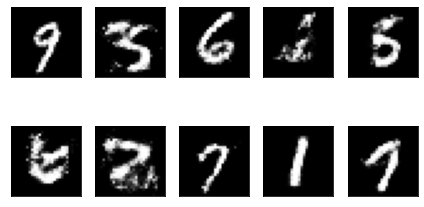

In [32]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(Xtrain) // batch_size):
        
        # Train Discriminator weights On
        discriminator.trainable = True
        
        # Real samples from dataset
        X_batch = Xtrain[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights Off
        discriminator.trainable = False
        d_g_loss_batch = gan.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(Xtrain) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()


**Evaluation of Model**

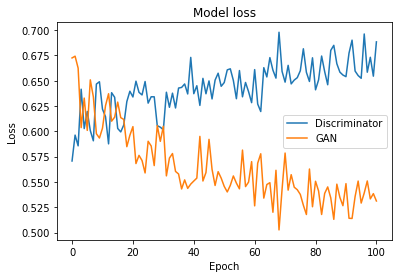

In [34]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'GAN'], loc='center right')
plt.show()